In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

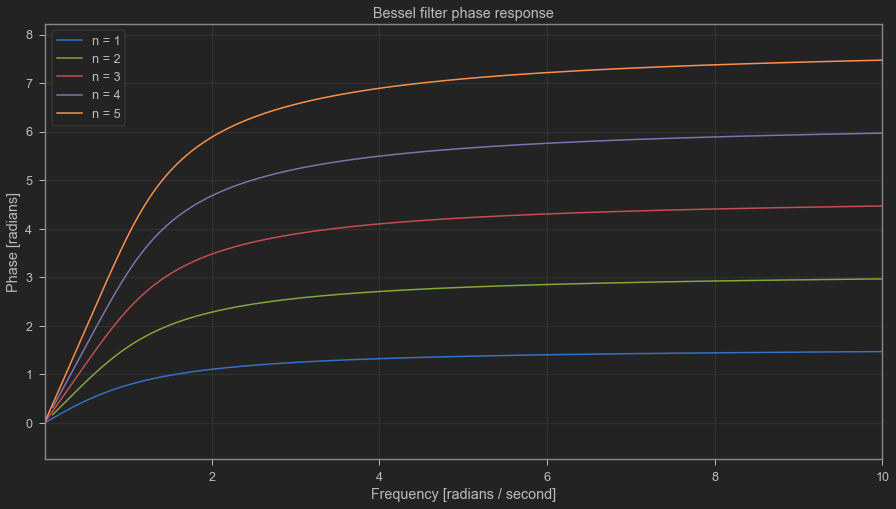

In [2]:
# Phase Response of Lowpass Bessel Filter
plt.figure(2, figsize=(15,8))
for i in range(1,6):
    b, a = sig.bessel(i, 1, 'low', analog=True, norm='phase')
    w, h = sig.freqs(b, a)
    plt.plot(w, -np.unwrap(np.angle(h)), label = 'n = {}'.format(i))

plt.title('Bessel filter phase response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [radians]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.legend()
plt.show()

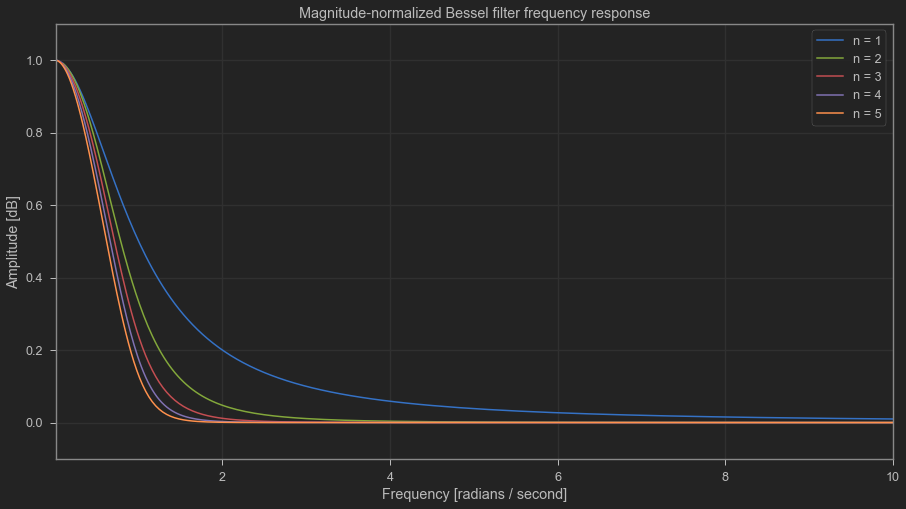

In [3]:
# Magnitude Response of Lowpass Bessel Filter
plt.figure(3, figsize=(15,8))
for i in range(1,6):
    b, a = sig.bessel(i, 1, 'low', analog=True, norm='phase')
    w, h = sig.freqs(b, a)
    plt.plot(w, np.power(abs(h), 2), label = 'n = {}'.format(i))

plt.title('Magnitude-normalized Bessel filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.legend()
plt.show()

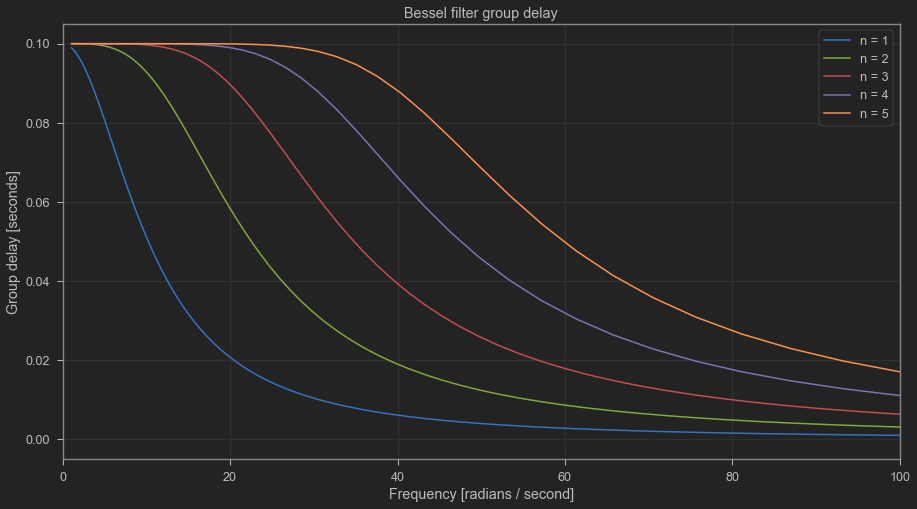

In [4]:
# Group Delay of Lowpass Bessel Filter
plt.figure(4, figsize=(15,8))
for i in range(1, 6):
    b, a = sig.bessel(i, 1/0.1, 'low', analog=True, norm='delay')
    sys = sig.TransferFunction(b, a)
    w, mag, phase = sig.bode(sys)
    group_delay = -np.diff(phase*np.pi/180) / np.diff(w)
    plt.plot(w[1:], group_delay, label = 'n = {}'.format(i))

plt.title('Bessel filter group delay')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Group delay [seconds]')
plt.xlim([0, 100])
plt.grid(which='both', axis='both')
plt.legend()
plt.show()

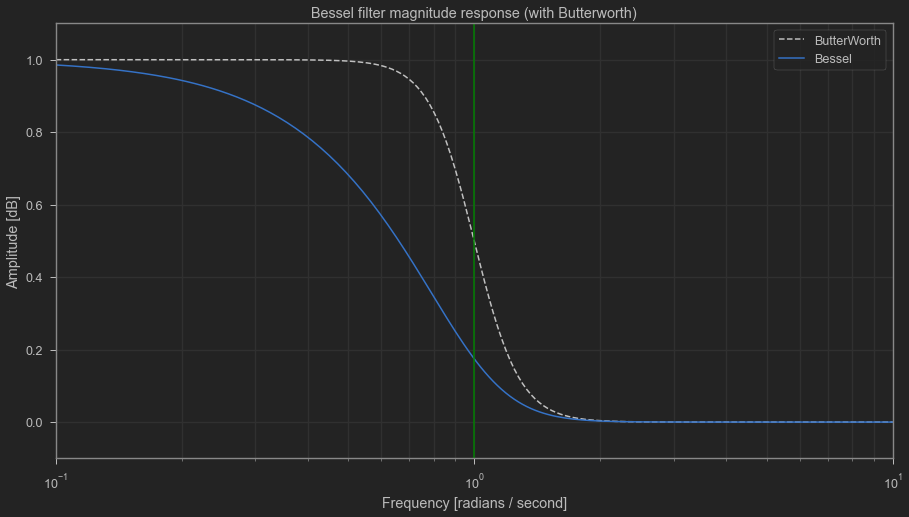

In [5]:
# Magnitude response of Lowpass Bessel Filter compared with Lowpass Butterworth Filter
b, a = sig.butter(4, 1, 'low', analog=True)
w, h = sig.freqs(b, a)
plt.figure(1, figsize=(15,8))
plt.semilogx(w, np.power(abs(h), 2), color='silver', ls='dashed', label='ButterWorth')
b, a = sig.bessel(4, 1, 'low', analog=True, norm='phase')
w, h = sig.freqs(b, a)
plt.semilogx(w, np.power(abs(h), 2), label='Bessel')
plt.title('Bessel filter magnitude response (with Butterworth)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(1, color='green')  # cutoff frequency
plt.legend()
plt.show()

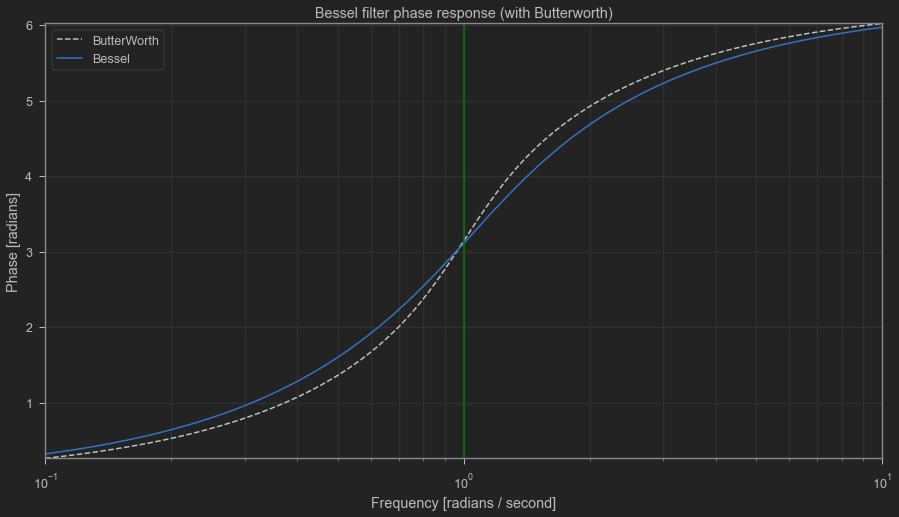

In [6]:
# Phase response of Lowpass Bessel Filter compared with Lowpass Butterworth Filter
b, a = sig.butter(4, 1, 'low', analog=True)
w, h = sig.freqs(b, a)
plt.figure(1, figsize=(15,8))
plt.semilogx(w, -np.unwrap(np.angle(h)), color='silver', ls='dashed', label='ButterWorth')
b, a = sig.bessel(4, 1, 'low', analog=True, norm='phase')
w, h = sig.freqs(b, a)
plt.semilogx(w, -np.unwrap(np.angle(h)), label='Bessel')
plt.title('Bessel filter phase response (with Butterworth)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [radians]')
plt.grid(which='both', axis='both')
plt.axvline(1, color='green')  # cutoff frequency
plt.legend()
plt.margins(0, 0)
plt.show()